# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='.\Reacher_Windows_x86_64\Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Import the Necessary Packages

In the next code cell, we will learn how to use the Python API to control the agent and receive feedback from the environment.

In [5]:
from ddpg_agent import Agent
from collections import deque
import torch
agent = Agent(33, 4, 0)

### 4. Instantiate the Environment and Agent

Once this cell is executed, you will watch the agent's performance. A window should pop up that allows you to observe the agent, as it moves through the environment. When training the environment, set train_mode=True, so that the line for resetting the environment looks like the following:

env_info = env.reset(train_mode=True)[brain_name]

In [6]:
env_info = env.reset(train_mode=True)[brain_name]
env_info.vector_observations.shape

(20, 33)

### 5. Train the Agent with DDPG to Solve the Environment on the Second Version

Run the code cell below to train the agent from scratch.  Alternatively, we can skip to the next code cell to load the pre-trained weights from file. For this project, we will provide you the second version which contains 20 identical agents, each with its own copy of the environment. In particular, our agents must get an average score of +30 (over 100 consecutive episodes, and over all agents). Specifically,

In [7]:
def ddpg(n_episodes=300, max_t=300, print_every=1):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros((20,))
        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += np.array(rewards)
            if any(dones):
                break 
                
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        #print('\rEpisode {}\tScore: {:.2f}'.format(i_episode, scores[-1]))
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            if len(scores_deque) == 100 and np.mean(scores_deque) >= 30:
                print('Done! Yay!')
                break
            
    return scores

scores = ddpg()

C:\Users\willy\Anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1	Average Score: 0.49
Episode 2	Average Score: 0.81
Episode 3	Average Score: 0.93
Episode 4	Average Score: 1.05
Episode 5	Average Score: 1.20
Episode 6	Average Score: 1.30
Episode 7	Average Score: 1.40
Episode 8	Average Score: 1.48
Episode 9	Average Score: 1.61
Episode 10	Average Score: 1.71
Episode 11	Average Score: 1.84
Episode 12	Average Score: 2.00
Episode 13	Average Score: 2.17
Episode 14	Average Score: 2.31
Episode 15	Average Score: 2.46
Episode 16	Average Score: 2.59
Episode 17	Average Score: 2.72
Episode 18	Average Score: 2.87
Episode 19	Average Score: 3.03
Episode 20	Average Score: 3.21
Episode 21	Average Score: 3.45
Episode 22	Average Score: 3.73
Episode 23	Average Score: 4.03
Episode 24	Average Score: 4.34
Episode 25	Average Score: 4.66
Episode 26	Average Score: 4.91
Episode 27	Average Score: 5.18
Episode 28	Average Score: 5.43
Episode 29	Average Score: 5.72
Episode 30	Average Score: 6.04
Episode 31	Average Score: 6.32
Episode 32	Average Score: 6.61
Episode 33	Averag

Generated the output plot below, where we have plotted the average score (over all 20 agents) obtained with each episode. The environment is considered solved, when the average (over 100 episodes) of those average scores is at least +30.

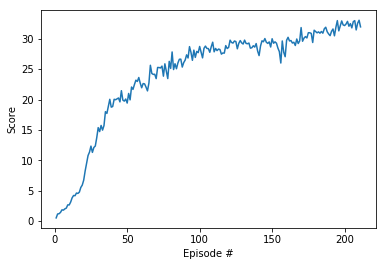

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores) + 1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

fig.savefig('scores.png')

### 6. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent! When finished, you can close the environment as following:

env.close()

In [9]:
def run_trained_agent():
    env_info = env.reset(train_mode=False)[brain_name]

    states = env_info.vector_observations
    agent.reset()
    while True:
        actions = agent.act(states)
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        states = next_states
        if any(dones):
            break 
            
run_trained_agent()

env.close()

C:\Users\willy\Anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
